Nota: Descargar archivo de [este enlace](https://www.datos.gob.ar/dataset/salud-tasa-natalidad)

In [1]:
import pandas as pd

nats = pd.read_csv("tasa-natalidad-deis-2000-2022.csv")
type(nats)

pandas.core.frame.DataFrame

In [2]:
nats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   indice_tiempo                              23 non-null     object 
 1   natalidad_argentina                        23 non-null     float64
 2   natalidad_ciudad_autonoma_de_buenos_aires  23 non-null     float64
 3   natalidad_buenos_aires                     23 non-null     float64
 4   natalidad_catamarca                        23 non-null     float64
 5   natalidad_cordoba                          23 non-null     float64
 6   natalidad_corrientes                       23 non-null     float64
 7   natalidad_chaco                            23 non-null     float64
 8   natalidad_chubut                           23 non-null     float64
 9   natalidad_entre_rios                       23 non-null     float64
 10  natalidad_formosa           

In [3]:
natalidad_argentina = nats["natalidad_argentina"]
natalidad_argentina.head()

0    19.0
1    18.2
2    18.3
3    18.4
4    19.3
Name: natalidad_argentina, dtype: float64

In [4]:
natarg_con_tiempos = nats[["indice_tiempo", "natalidad_argentina"]]
natarg_con_tiempos.head()

,indice_tiempo,natalidad_argentina
0,2000-01-01,19.0
1,2001-01-01,18.2
2,2002-01-01,18.3
3,2003-01-01,18.4
4,2004-01-01,19.3


In [5]:
natarg_con_tiempos.describe()

,natalidad_argentina
count,23.000000
mean,16.956522
std,2.540549
min,10.700000
25%,16.350000
50%,17.900000
75%,18.500000
max,19.300000


In [6]:
mask = natarg_con_tiempos["indice_tiempo"] >= "2015-01-01"
natarg_con_tiempos[mask]

,indice_tiempo,natalidad_argentina
15,2015-01-01,17.9
16,2016-01-01,16.7
17,2017-01-01,16.0
18,2018-01-01,15.4
19,2019-01-01,13.9
20,2020-01-01,11.8
21,2021-01-01,11.6
22,2022-01-01,10.7


In [7]:
provinces = nats.iloc[:, 2:7]
provinces[:3]

,natalidad_ciudad_autonoma_de_buenos_aires,natalidad_buenos_aires,natalidad_catamarca,natalidad_cordoba,natalidad_corrientes
0,14.3,17.5,25.8,17.2,22.7
1,13.9,16.9,24.9,15.9,21.9
2,13.6,17.0,24.4,16.6,23.3


In [8]:
nats["prov_min"] = provinces.min(axis=1)
nats["prov_max"] = provinces.max(axis=1)
reduced = nats[["indice_tiempo", "natalidad_argentina", "prov_min", "prov_max"]]
reduced[:3]

,indice_tiempo,natalidad_argentina,prov_min,prov_max
0,2000-01-01,19.0,14.3,25.8
1,2001-01-01,18.2,13.9,24.9
2,2002-01-01,18.3,13.6,24.4


In [10]:
reduced.loc[:, "range"] = reduced["prov_max"] - reduced["prov_min"]
reduced.loc[:, "año"] = reduced["indice_tiempo"].str[:4]
reduced[:3]

,indice_tiempo,natalidad_argentina,prov_min,prov_max,range,año
0,2000-01-01,19.0,14.3,25.8,11.5,2000
1,2001-01-01,18.2,13.9,24.9,11.0,2001
2,2002-01-01,18.3,13.6,24.4,10.8,2002


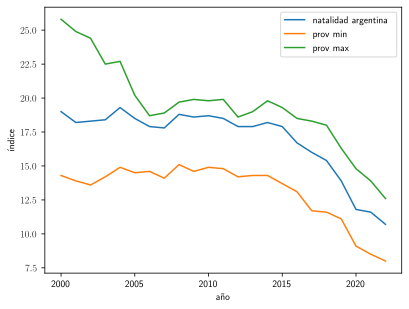

In [11]:
cols = reduced[["año", "natalidad_argentina", "prov_min", "prov_max"]]
subplot = cols.plot(x="año", ylabel="índice")

In [12]:
type(subplot)

matplotlib.axes._axes.Axes

In [13]:
reduced[:3].to_numpy()

array([['2000-01-01', 19.0, 14.3, 25.8, 11.5, '2000'],
       ['2001-01-01', 18.2, 13.9, 24.9, 10.999999999999998, '2001'],
       ['2002-01-01', 18.3, 13.6, 24.4, 10.799999999999999, '2002']],
      dtype=object)

In [14]:
csv_dumped = reduced[:3].to_csv()
for linea in csv_dumped.split("\n"):
    print(linea)   # para mostrarlo más sencillamente aqui

,indice_tiempo,natalidad_argentina,prov_min,prov_max,range,año
0,2000-01-01,19.0,14.3,25.8,11.5,2000
1,2001-01-01,18.2,13.9,24.9,10.999999999999998,2001
2,2002-01-01,18.3,13.6,24.4,10.799999999999999,2002



In [15]:
key = "/data"  # el grupo base en la estructura de HDF5
reduced.to_hdf(path_or_buf="/tmp/testpandas.h5", key=key)

In [16]:
import h5py

fh = h5py.File("/tmp/testpandas.h5", "r")
[title.decode("utf8") for title in fh["data"]["axis0"]]

['indice_tiempo',
 'natalidad_argentina',
 'prov_min',
 'prov_max',
 'range',
 'año']


### Copyright 2020-2025 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

